##### 라이브러리 설치

In [4]:
%pip install azure-cognitiveservices-vision-customvision


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 라이브러리 import

In [5]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient 
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient 
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region 
from msrest.authentication import ApiKeyCredentials 
import os, time, uuid
 

#### 필수 기본 정보 설정

In [6]:
TRAINiNG_ENDPOINT = "https://7ai010customvision.cognitiveservices.azure.com/"
PREDICTION_ENDPOINT = "https://7ai010customvision-prediction.cognitiveservices.azure.com/"

TRAINING_API_KEY = "1ab6Tkv0vcWHjJiik17iRqOhDb58klDtlfxDncODFSLPKB1PcxzfJQQJ99BGACHYHv6XJ3w3AAAJACOGlz8l"
PREDICTION_API_KEY = "75Ce8c02QZv35GXuxgei6vRdyeLqtbzDV581jgJwsy83iOqhpVlmJQQJ99BGACHYHv6XJ3w3AAAIACOGz7yy"

PREDICTION_RESOURCE_ID = "/subscriptions/b850d62a-25fe-4d3a-9697-ea40449528a9/resourceGroups/7a010-ai-group/providers/Microsoft.CognitiveServices/accounts/7ai010customvision-Prediction"

#### Trainer, Predictor를 객체화

In [24]:
training_credentials = ApiKeyCredentials(in_headers={"Training-key" : TRAINING_API_KEY})
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key" : PREDICTION_API_KEY})

trainer = CustomVisionTrainingClient(endpoint=TRAINiNG_ENDPOINT, credentials=training_credentials)
predictor = CustomVisionPredictionClient(endpoint=PREDICTION_ENDPOINT, credentials=prediction_credentials)

In [8]:
project_list = trainer.get_projects()

for project in project_list:
    print("PROJECT ID : {} | {} | DOMAIN : {}".format(project.id, project.name, project.settings.domain_id))

domain_list = trainer.get_domains()

for domain in domain_list:
    print("DOMAIN : {} | {} | {}".format(domain.id, domain.name, domain.type))


PROJECT ID : 4600055f-8ead-4747-8c51-0a93e330e569 | 7ai010-kitchen | DOMAIN : 7ec2ac80-887b-48a6-8df9-8b1357765430
PROJECT ID : 548bee0e-6ec2-4d97-bd53-05c25f883587 | 7ai010-food | DOMAIN : 7ec2ac80-887b-48a6-8df9-8b1357765430
PROJECT ID : d29f1b66-6855-4400-ac8b-2850a4a79bf1 | 7ai010-customvision | DOMAIN : 9c616dff-2e7d-ea11-af59-1866da359ce6
DOMAIN : 2e37d7fb-3a54-486a-b4d6-cfc369af0018 | General [A2] | Classification
DOMAIN : a8e3c40f-fb4a-466f-832a-5e457ae4a344 | General [A1] | Classification
DOMAIN : ee85a74c-405e-4adc-bb47-ffa8ca0c9f31 | General | Classification
DOMAIN : c151d5b5-dd07-472a-acc8-15d29dea8518 | Food | Classification
DOMAIN : ca455789-012d-4b50-9fec-5bb63841c793 | Landmarks | Classification
DOMAIN : b30a91ae-e3c1-4f73-a81e-c270bff27c39 | Retail | Classification
DOMAIN : 45badf75-3591-4f26-a705-45678d3e9f5f | Adult | Classification
DOMAIN : a1db07ca-a19a-4830-bae8-e004a42dc863 | General (compact) [S1] | Classification
DOMAIN : 0732100f-1a38-4e49-a514-c9b44c697ab5 | 

#### 프로젝트 만들기

In [9]:
project_name = "7ai010-kitchen"
project_description = "음식을 감지하는 모델"

project_id = None
domain_id = None
project = None

# 기존 프로젝트 존재 여부 확인
for project in trainer.get_projects():

    if project.name == project_name:
        project_id = project.id
        print(project_id, "이미 있음 !!!")
        break

# 원하는 도메인을 들고옴
for domain in trainer.get_domains():
    if domain.type == "ObjectDetection" and domain.name == "General (compact) [S1]":
        domain_id =domain.id
        print("PROJECT ID : {} | {} | DOMAIN : {}".format(project.id, project.name, project.settings.domain_id))
        break

if domain_id and project_id is None:
    project = trainer.create_project(project_name, project_description, domain_id)
    print("프로젝트 생성 완료 !!")
    print(project.id, project.name)
else:
    project = trainer.get_project(project_id)
    print("프로젝트 가져옴 !!")
    print(project.id, project.name)

4600055f-8ead-4747-8c51-0a93e330e569 이미 있음 !!!
PROJECT ID : 4600055f-8ead-4747-8c51-0a93e330e569 | 7ai010-kitchen | DOMAIN : 7ec2ac80-887b-48a6-8df9-8b1357765430
프로젝트 가져옴 !!
4600055f-8ead-4747-8c51-0a93e330e569 7ai010-kitchen


### 태그 만들기

In [10]:
FORK_TAG_NAME = "포크"
SCISSORS_TAG_NAME = "가위"

fork_tag = None
scissors_tag = None

exist_tag_list = trainer.get_tags(project_id=project.id)

for tag in exist_tag_list:
    if tag.name == FORK_TAG_NAME:
        print("{} {} 들고 옴 !!".format(tag.id, tag.name))
        fork_tag = tag
    if tag.name == SCISSORS_TAG_NAME:
        print(print("{} {} 들고 옴 !!".format(tag.id, tag.name)))
        scissors_tag = tag

if fork_tag is None:
    fork_tag = trainer.create_tag(project_id, FORK_TAG_NAME)
    print("포크 태그 생성완료 !!")

if scissors_tag is None:
    scissors_tag = trainer.create_tag(project_id, SCISSORS_TAG_NAME)
    print("가위 태그 생성완료 !!")
    

66d355cb-db1a-4e88-b79a-01651200e11b 포크 들고 옴 !!
f651f653-536b-414f-a67f-e6cf1ab47d41 가위 들고 옴 !!
None


### Labeling 데이터

In [11]:
# [x, y, width, height]
fork_image_regions = {
    "fork_1": [ 0.145833328, 0.3509314, 0.5894608, 0.238562092 ],
    "fork_2": [ 0.294117659, 0.216944471, 0.534313738, 0.5980392 ],
    "fork_3": [ 0.09191177, 0.0682516545, 0.757352948, 0.6143791 ],
    "fork_4": [ 0.254901975, 0.185898721, 0.5232843, 0.594771266 ],
    "fork_5": [ 0.2365196, 0.128709182, 0.5845588, 0.71405226 ],
    "fork_6": [ 0.115196079, 0.133611143, 0.676470637, 0.6993464 ],
    "fork_7": [ 0.164215669, 0.31008172, 0.767156839, 0.410130739 ],
    "fork_8": [ 0.118872553, 0.318251669, 0.817401946, 0.225490168 ],
    "fork_9": [ 0.18259804, 0.2136765, 0.6335784, 0.643790841 ],
    "fork_10": [ 0.05269608, 0.282303959, 0.8088235, 0.452614367 ],
    "fork_11": [ 0.05759804, 0.0894935, 0.9007353, 0.3251634 ],
    "fork_12": [ 0.3345588, 0.07315363, 0.375, 0.9150327 ],
    "fork_13": [ 0.269607842, 0.194068655, 0.4093137, 0.6732026 ],
    "fork_14": [ 0.143382356, 0.218578458, 0.7977941, 0.295751631 ],
    "fork_15": [ 0.19240196, 0.0633497, 0.5710784, 0.8398692 ],
    "fork_16": [ 0.140931368, 0.480016381, 0.6838235, 0.240196079 ],
    "fork_17": [ 0.305147052, 0.2512582, 0.4791667, 0.5408496 ],
    "fork_18": [ 0.234068632, 0.445702642, 0.6127451, 0.344771236 ],
    "fork_19": [ 0.219362751, 0.141781077, 0.5919118, 0.6683006 ],
    "fork_20": [ 0.180147052, 0.239820287, 0.6887255, 0.235294119 ]
}

scissors_image_regions = {
    "scissors_1": [ 0.4007353, 0.194068655, 0.259803921, 0.6617647 ],
    "scissors_2": [ 0.426470578, 0.185898721, 0.172794119, 0.5539216 ],
    "scissors_3": [ 0.289215684, 0.259428144, 0.403186262, 0.421568632 ],
    "scissors_4": [ 0.343137264, 0.105833367, 0.332107842, 0.8055556 ],
    "scissors_5": [ 0.3125, 0.09766343, 0.435049027, 0.71405226 ],
    "scissors_6": [ 0.379901975, 0.24308826, 0.32107842, 0.5718954 ],
    "scissors_7": [ 0.341911763, 0.20714055, 0.3137255, 0.6356209 ],
    "scissors_8": [ 0.231617644, 0.08459154, 0.504901946, 0.8480392 ],
    "scissors_9": [ 0.170343131, 0.332957536, 0.767156839, 0.403594762 ],
    "scissors_10": [ 0.204656869, 0.120539248, 0.5245098, 0.743464053 ],
    "scissors_11": [ 0.05514706, 0.159754932, 0.799019635, 0.730392158 ],
    "scissors_12": [ 0.265931368, 0.169558853, 0.5061275, 0.606209159 ],
    "scissors_13": [ 0.241421565, 0.184264734, 0.448529422, 0.6830065 ],
    "scissors_14": [ 0.05759804, 0.05027781, 0.75, 0.882352948 ],
    "scissors_15": [ 0.191176474, 0.169558853, 0.6936275, 0.6748366 ],
    "scissors_16": [ 0.1004902, 0.279036, 0.6911765, 0.477124184 ],
    "scissors_17": [ 0.2720588, 0.131977156, 0.4987745, 0.6911765 ],
    "scissors_18": [ 0.180147052, 0.112369314, 0.6262255, 0.6666667 ],
    "scissors_19": [ 0.333333343, 0.0274019931, 0.443627447, 0.852941155 ],
    "scissors_20": [ 0.158088237, 0.04047389, 0.6691176, 0.843137264 ]
}

In [12]:
with open('./fork/fork_20.jpg', "rb")as image:
    image_data = image.read()

image_data

with open('./scissors/scissors_20.jpg', "rb")as image:
    image_data = image.read()

image_data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02d\x030\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\

### 이미지 업로드 : Labeling 위한 Region이 설정 되어야 하고, 태그를 포함해서 이미지를 업로드

In [ ]:
image_list = list()

# 포크
for file_name in  fork_image_regions.keys():
    file_path = "./fork/{}.jpg".format(file_name)
    left, top, width, height = fork_image_regions[file_name]

    regions = [Region(tag_id=fork_tag.id, left=left, top=top, width=width, height=height)]

    with open(file_path, "rb")as image:
        image_data = image.read()

    entry = ImageFileCreateEntry(name=file_name, contents=image_data, regions=regions)
    image_list.append(entry)

# 가위
for file_name in  scissors_image_regions.keys():
    file_path = "./scissors/{}.jpg".format(file_name)
    left, top, width, height = scissors_image_regions[file_name]

    regions = [Region(tag_id=scissors_tag.id, left=left, top=top, width=width, height=height)]

    with open(file_path, "rb")as image:
        image_data = image.read()

    entry = ImageFileCreateEntry(name=file_name, contents=image_data, regions=regions)
    image_list.append(entry)

len(image_list)

batch = ImageFileCreateBatch(images=image_list)
result = trainer.create_images_from_files(project_id=project.id, batch=batch)

if result.is_batch_successful:
    print("업로드 성공 !")

else:
    for image in result.images:
        print("{} : {}".format(image.source_url, image.status))

# for file_name in  scissors_image_regions.keys():
#     file_path = "./scissors/{}.jpg".format(file_name)
    
#     with open(file_path, "rb")as image:
#         image_data = image.read()


scissors_14 : OKDuplicate
scissors_15 : OKDuplicate
scissors_11 : OKDuplicate
scissors_10 : OKDuplicate
scissors_7 : OKDuplicate
scissors_20 : OKDuplicate
scissors_18 : OKDuplicate
scissors_17 : OKDuplicate
scissors_1 : OKDuplicate
fork_14 : OKDuplicate
fork_19 : OKDuplicate
fork_18 : OKDuplicate
fork_15 : OKDuplicate
scissors_5 : OKDuplicate
fork_17 : OKDuplicate
scissors_6 : OKDuplicate
fork_16 : OKDuplicate
fork_12 : OKDuplicate
scissors_8 : OKDuplicate
fork_9 : OKDuplicate
fork_8 : OKDuplicate
scissors_13 : OKDuplicate
scissors_2 : OKDuplicate
scissors_4 : OKDuplicate
fork_10 : OKDuplicate
fork_6 : OKDuplicate
fork_20 : OKDuplicate
fork_3 : OKDuplicate
scissors_19 : OKDuplicate
scissors_16 : OKDuplicate
scissors_12 : OKDuplicate
scissors_9 : OKDuplicate
fork_5 : OKDuplicate
fork_4 : OKDuplicate
fork_2 : OKDuplicate
scissors_3 : OKDuplicate
fork_13 : OKDuplicate
fork_11 : OKDuplicate
fork_7 : OKDuplicate
fork_1 : OKDuplicate


### 트레이닝

In [19]:
import time

exist_iteration_list = trainer.get_iterations(project_id=project.id)

iteration = None

try:
    iteration = trainer.train_project(project_id=project.id)

except:
    iteration = exist_iteration_list[0]


while iteration.status == "Training":
    print("{} : {}".format(iteration.name, iteration.status))
    iteration = trainer.get_iteration(project_id=project.id, iteration_id=iteration.id)
    time.sleep(3)

print(iteration.id, iteration.name, iteration.status)

# iteration = trainer.train_project(project_id=project.id)

3f6421c1-1f67-41da-b834-c38a66afc1e7 Iteration 1 Completed


### 배포

In [23]:
publish_name = "7ai010-kitchen-v1"

try:
    trainer.publish_iteration(project_id=project.id, iteration_id=iteration.id, publish_name=publish_name, prediction_id=PREDICTION_RESOURCE_ID)

except Exception as e:
    print(e)


### 예측

가위 0.9591563
32.067107840000006 7.117409277999999 1179.7486847999999 720.2500602


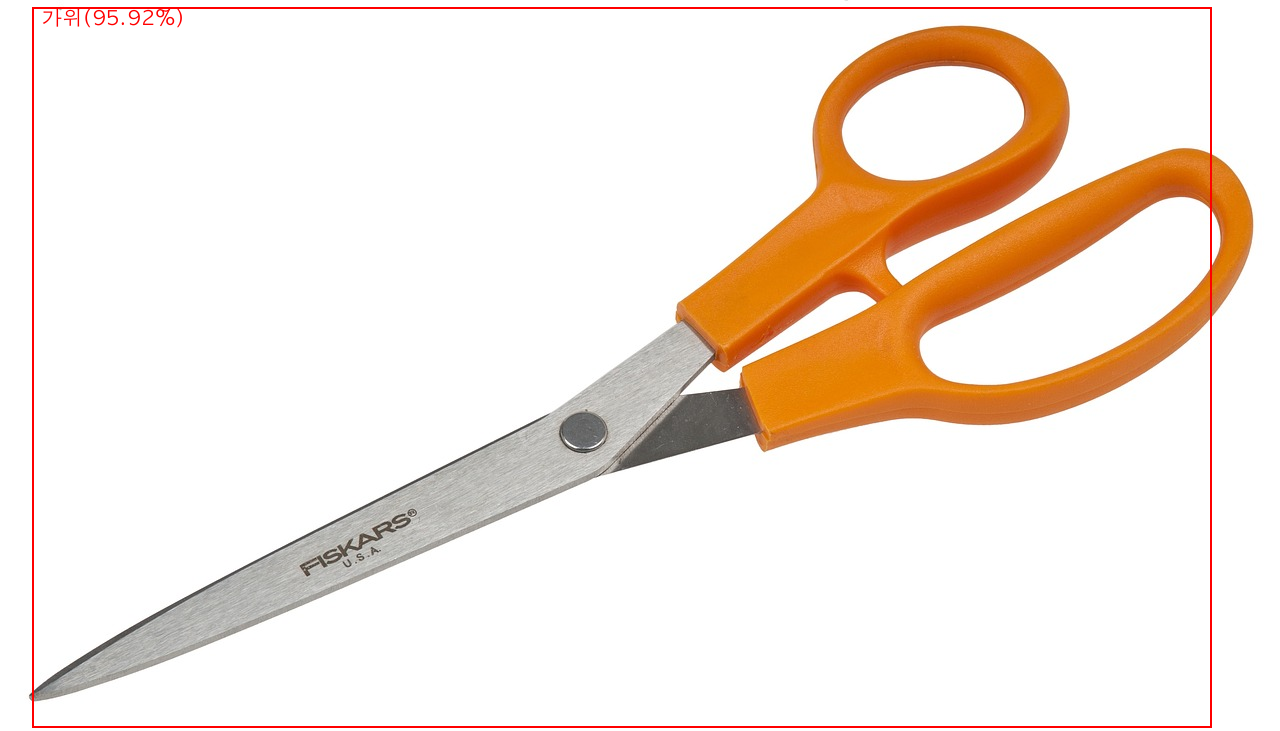

In [30]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

IMAGE_URL = "https://cdn.pixabay.com/photo/2017/04/04/17/16/scissors-2202215_1280.jpg"

def get_font():
    # OS별로 적절한 폰트 객체 반환 (한글 지원)
    from PIL import ImageFont
    import platform
    
    font_size = 20
    
    try:
        if platform.system() == "Windows":
            # 윈도우용 한글 폰트
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin":  # macOS
            # 맥용 한글 폰트
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else:  # Linux      
            # 리눅스 기본 폰트
            return ImageFont.load_default(size=font_size)
    except IOError:
        # 폰트 파일이 없을 경우 기본 폰트 사용
        return ImageFont.load_default(size=font_size)


image_response = requests.get(IMAGE_URL)
image_data = image_response.content
image = Image.open(BytesIO(image_data))
draw = ImageDraw.Draw(image, 'RGBA')
font = get_font()

image_width, image_height = image.size

response = predictor.detect_image(project_id=project.id, published_name=publish_name, image_data=image_data)
# response = predictor.detect_image_url(project_id=project.id, published_name=publish_name, url=IMAGE_URL)

prediction_list = response.predictions

for prediction in prediction_list:
    tag_name = prediction.tag_name
    probability = prediction.probability
    bounding_box = prediction.bounding_box
    
    left = bounding_box.left * image_width
    top = bounding_box.top * image_height
    width = bounding_box.width * image_width
    height = bounding_box.height * image_height
    
    if probability > 0.5:
        print(tag_name, probability)
        print(left, top, width, height)
        draw.rectangle([(left, top), (left + width, top + height)], outline="red", width=2)
        draw.text((left + 10, top), "{}({:.2f}%)".format(tag_name, probability * 100), font=font, fill="red")
        
image

In [31]:
from azure.cognitiveservices.vision.customvision.training.models import ExportPlatform
trainer.export_iteration(project_id=project.id, iteration_id=iteration.id, platform=ExportPlatform.onnx)


In [ ]:
export_list = trainer.get_exports(project_id=project.id, iteration_id=iteration.id)
 
export_list[-1]